In [232]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as pl
%matplotlib inline
from IPython.display import display 

In [233]:
data=pd.read_csv("telco_churn.csv", delimiter=';')

In [234]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,"29,85","29,85",No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,"56,95","1889,5",No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,"53,85","108,15",Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),"42,3","1840,75",No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,"70,7","151,65",Yes


In [235]:
data.shape
data.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

In [236]:
data.apply(lambda x:sum(x.isnull()))

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [237]:
churn_class = data['Churn']
data_raw = data.drop('Churn', axis=1)
features = list(data_raw.columns.values)

print features

features_obj = list(data_raw.select_dtypes(include=['object']))

print features_obj

churn_class = churn_class.apply(lambda x: 1 if x == 'Yes' else 0)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [238]:
for i in features_obj:
    print "Variable Name: %s" %i
    print data_raw[i].value_counts()

Variable Name: customerID
5199-FPUSP    1
3696-XRIEN    1
2788-CJQAQ    1
0330-IVZHA    1
8631-XVRZL    1
8234-GSZYK    1
1501-SGHBW    1
6542-LWGXJ    1
4349-GFQHK    1
6103-QCKFX    1
9965-YOKZB    1
9027-YFHQJ    1
6297-NOOPG    1
3097-IDVPU    1
7989-VCQOH    1
2091-MJTFX    1
9924-JPRMC    1
8404-VIOMB    1
6633-MPWBS    1
5039-LZRQT    1
0975-VOOVL    1
6362-QHAFM    1
0945-TSONX    1
2077-DDHJK    1
5384-ZTTWP    1
2868-LLSKM    1
2525-GVKQU    1
0280-XJGEX    1
4891-NLUBA    1
7470-DYNOE    1
             ..
7980-MHFLQ    1
3908-BLSYF    1
7404-JLKQG    1
1810-BOHSY    1
8189-XRIKE    1
3533-UVMOM    1
8107-RZLNV    1
0603-TPMIB    1
2933-XEUJM    1
0334-GDDSO    1
9867-XOBQA    1
4718-DHSMV    1
9927-DSWDF    1
2642-MAWLJ    1
9691-HKOVS    1
2000-DHJUY    1
9633-DENPU    1
3774-VBNXY    1
7785-RDVIG    1
3709-OIJEA    1
4412-YLTKF    1
5203-XEHAX    1
4013-TLDHQ    1
8212-DJRCH    1
5857-XRECV    1
8107-KNCIM    1
1337-BOZWO    1
0665-XHDJU    1
3798-EPWRR    1
0530-IJVDB    

In [239]:
data_raw=data_raw.drop('customerID', axis=1)

In [240]:
#data_raw['MonthlyCharges'] = data_raw['MonthlyCharges'].convert_objects(convert_numeric=True)
#data_raw['TotalCharges'] = data_raw['TotalCharges'].convert_objects(convert_numeric=True)

#print data_raw['TotalCharges']

data_raw['TotalCharges'] = data_raw['TotalCharges'].str.replace(' ','0')
data_raw['TotalCharges'] = data_raw['TotalCharges'].str.replace(',','.')
data_raw['TotalCharges'] = pd.to_numeric(data_raw['TotalCharges'], downcast='float')

data_raw['MonthlyCharges'] = data_raw['MonthlyCharges'].str.replace(' ','0')
data_raw['MonthlyCharges'] = data_raw['MonthlyCharges'].str.replace(',','.')
data_raw['MonthlyCharges'] = pd.to_numeric(data_raw['MonthlyCharges'], downcast='float')


#data_raw['MonthlyCharges'] = data_raw['MonthlyCharges'].astype(float)
#data_raw['TotalCharges'] = data_raw['TotalCharges'].astype(float)

data_raw.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float32
TotalCharges        float32
dtype: object

In [245]:
features_obj = list(data_raw.select_dtypes(include=['object']))

data_raw.head()
churn_class.value_counts()
churn_class.dtypes

dtype('int64')

In [246]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in features_obj:
    data_raw[col] = le.fit_transform(data[col])

In [247]:
data_raw.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.850000,29.850000
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.950001,1889.500000
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.849998,108.150002
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.299999,1840.750000
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.699997,151.649994


In [248]:
display(data_raw.describe())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761826,2279.732178
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.089973,2266.794434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.549988
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.349998,1394.550049
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.849998,3786.599976
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.799805


In [249]:
from sklearn import cross_validation, metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, fbeta_score, f1_score    

In [250]:
X_train, X_test, y_train, y_test = train_test_split(data_raw, churn_class, test_size=0.2, random_state=42)

In [251]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
#regressor = DecisionTreeRegressor(random_state=42)
#regressor.fit(X_train, y_train)

In [254]:
def data_train(learner, X_train, y_train, X_test, y_test):
    
    results = {}
    learner = learner.fit(X_train, y_train)
    y_pred = learner.predict(X_test)
    
    results['cv_score'] = cross_validation.cross_val_score(learner, X_train, y_train, cv=5)
    results['acc_score'] = accuracy_score(y_test, y_pred.round(), normalize=True)
    results['f1_score'] = f1_score(y_test,y_pred.round())

    print "{} : {} samples are trained.".format(learner.__class__.__name__, len(X_train))
    return results


In [255]:
clf_A=DecisionTreeRegressor()
clf_B=GradientBoostingClassifier()
clf_C=AdaBoostClassifier()
clf_D=RandomForestClassifier()

results = {}
for clf in [clf_A, clf_B, clf_C,clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = data_train(clf, X_train, y_train, X_test, y_test)

print results

DecisionTreeRegressor : 5634 samples are trained.
GradientBoostingClassifier : 5634 samples are trained.
AdaBoostClassifier : 5634 samples are trained.
RandomForestClassifier : 5634 samples are trained.
{'RandomForestClassifier': {'f1_score': 0.51923076923076927, 'acc_score': 0.78708303761533005, 'cv_score': array([ 0.78723404,  0.78438332,  0.7826087 ,  0.77619893,  0.77886323])}, 'AdaBoostClassifier': {'f1_score': 0.58997050147492625, 'acc_score': 0.80269694819020587, 'cv_score': array([ 0.81294326,  0.80479148,  0.78881988,  0.78952043,  0.79573712])}, 'GradientBoostingClassifier': {'f1_score': 0.59670164917541235, 'acc_score': 0.80908445706174592, 'cv_score': array([ 0.81117021,  0.8065661 ,  0.79414374,  0.78952043,  0.79484902])}, 'DecisionTreeRegressor': {'f1_score': 0.48883048620236536, 'acc_score': 0.72391767210787794, 'cv_score': array([-0.23792513, -0.43637794, -0.33284259, -0.38361763, -0.51063849])}}


In [263]:
def modelfit(alg, X_train, y_train, X_test, y_test,  predictors):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    y_pred = alg.predict(X_test)
    y_predprob = alg.predict_proba(X_test)[:,1]
    
    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, X_train, y_train, cv=5, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob)
    
    print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
                
    #Print Feature Importance:
    feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    pl.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.8091
AUC Score (Train): 0.860636
CV Score : Mean - 0.8415453 | Std - 0.009993074 | Min - 0.8323998 | Max - 0.8598873


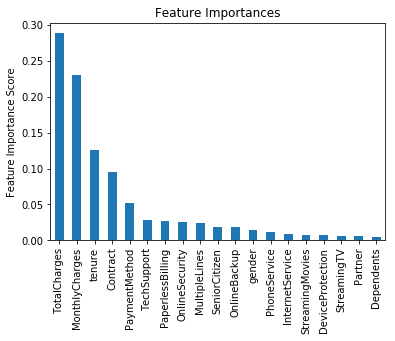

In [264]:
gbm0 = GradientBoostingClassifier(random_state=42)
#print predictors
modelfit(gbm0, X_train, y_train, X_test, y_test, predictors)

In [265]:
param_test1 = {'n_estimators':range(10,201,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=2,
                                  min_samples_leaf=1, max_depth=8, max_features=None, subsample=1.0, random_state=42), 
                       param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)

gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 60}, 0.78877946483907535)

In [269]:
param_test2 = {'max_depth':range(1,16,2)}#, 'min_samples_split':range(2,1001,200)}

gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=190, learning_rate=0.1, min_samples_split=2,
                                                                #min_samples_split=2, max_depth=8,
                                  min_samples_leaf=1, max_features=None, subsample=1.0, random_state=42), 
                       param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)

gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 1}, 0.80191026502861606)

In [270]:
param_test3 = {'min_samples_split':range(2,1001,200)}

gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=190, learning_rate=0.1, max_depth=1,
                                                                #min_samples_split=2, max_depth=8,
                                  min_samples_leaf=1, max_features=None, subsample=1.0, random_state=42), 
                       param_grid = param_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)

gsearch3.best_params_, gsearch3.best_score_

({'min_samples_split': 2}, 0.80191026502861606)

In [271]:
param_test4 = {'min_samples_leaf':range(1,201,10)}

gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=190, learning_rate=0.1, max_depth=1,
                                                                #min_samples_split=2, max_depth=8,
                                  #min_samples_leaf=1, 
                                                               max_features=None, subsample=1.0, random_state=42), 
                       param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)

gsearch4.best_params_, gsearch4.best_score_

({'min_samples_leaf': 31}, 0.80297488171891285)


Model Report
Accuracy : 0.8062
AUC Score (Train): 0.864597
CV Score : Mean - 0.8438584 | Std - 0.009623539 | Min - 0.8342298 | Max - 0.8622967


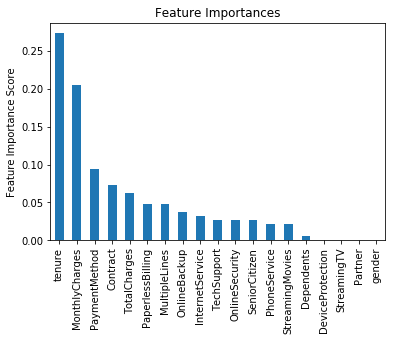

In [278]:
model_final = GradientBoostingClassifier(n_estimators=190, learning_rate=0.1, max_depth=1,
                                                                min_samples_split=2, min_samples_leaf=31, 
                                                               max_features=None, subsample=1.0, random_state=42)

modelfit(model_final, X_train, y_train, X_test, y_test, predictors)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012D61710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000012D3DD68>], dtype=object)

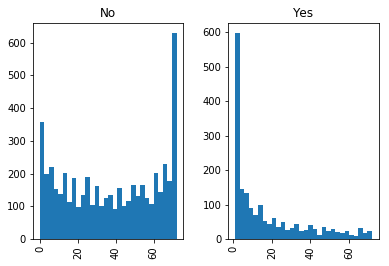

In [280]:
data.hist(column="tenure",by="Churn",bins=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014FB5D68>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000001550AF60>], dtype=object)

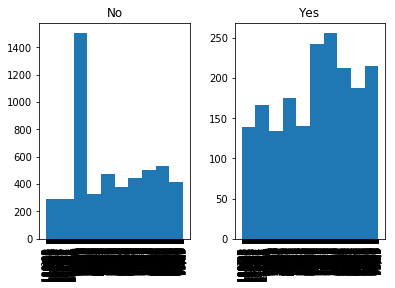

In [282]:
data.hist(column="MonthlyCharges",by="Churn")